In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import bs4
import requests

In [3]:
club_data = []
for x in range(1, 33):
    url = 'http://competitie.vttl.be/index.php?menu=1&cur_page='+str(x)
    r  = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    table = soup.find('table', attrs={'class':'DBTable'})
    rows = table.find_all('tr')[2:-2]
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        club_data.append([ele for ele in cols if ele])

In [4]:
club_df = pd.DataFrame(club_data)
club_df.columns = ['index', 'club', 'categorie', 'atl lokalen', 'site']
club_df.set_index('index', inplace=True)
club_df.index.name = None

In [229]:
club_df.head()

,club,categorie,atl lokalen,site
000,Indiv. KBTTB/FRBTT,FRBTT,0,-
VTTL,Buitenland,VTTL,0,-
VTTL,Individueel,VTTL,0,None
AF001,Individuel Aile Francophone,AF,0,None
Vl-B000,Individueel Vlaams-Brabant,Vlaams-Brabant & Br.,1,None


In [854]:
naamjuist_elo_df[(naamjuist_elo_df["naam_juist"]=="CEDRIC NUYTINCK") & (naamjuist_elo_df["club_y"]=="Merelbeke")].punten.values[0]

'1667'

In [783]:
#Opmerking: om in deze rangschikking te worden opgenomen, 
#moet de speler tenminste 24 individuele ontmoetingen in de laatste 12 maanden hebben gespeeld.
elo_data = []
for x in range(1, 191):
    url = 'http://competitie.vttl.be/index.php?menu=5&perelo=1&club_id=0&cur_page='+str(x)
    r  = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    table = soup.find('table', attrs={'class':'DBTable'})
    rows = table.find_all('tr')[2:-2]
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        elo_data.append([ele for ele in cols if ele])

In [784]:
elo_df = pd.DataFrame(elo_data)
elo_df.columns = ['plaats', 'naam', 'klassement', 'club', 'punten']

In [785]:
elo_df.tail()

,plaats,naam,klassement,club,punten
18938,18879,BOUTEN ALANA,NG,Zonnebeke,0
18939,18879,VANWINNENDAELE CHRISTINE,NG,Ctt Bosquet,0
18940,18879,JAEKEN STAF,NG,Voorshoven,0
18941,18879,CULOT ANAELLE,NG,Palette Rancoise,0
18942,18879,DONNAY DANY,NG,Ans,0


In [800]:
print("aantal dubbele namen: ",len(elo_df.naam[elo_df.naam.duplicated(keep=False)].index))
elo_df[elo_df["naam"]=="MARTIN JULIEN"]
#er zijn toch wel redelijk wat dezelfde namen, wat doen we daar mee?

aantal dubbele namen:  304


,plaats,naam,klassement,club,punten
69,70,MARTIN JULIEN,B2,Vedrinamur,2355
11182,11179,MARTIN JULIEN,E4,TT Castors,769


In [816]:
player_data = []
for x in range(1, 418):
    url = 'http://competitie.vttl.be/index.php?menu=6&club_id=0&categ_id=1&cur_page='+str(x)
    r  = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    table = soup.find_all('table', attrs={'class':'DBTable'})[-1]
    rows = table.find_all('tr')[2:-2]
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        player_data.append([ele for ele in cols if ele])

In [817]:
player_df = pd.DataFrame(player_data)
player_df.columns = ['lidnummer', 'achternaam', 'voornaam', 'klassement', 'club']

In [822]:
def get_namen(row):
    achternaam = str(row['achternaam'])
    achternaam = achternaam.replace(u'\xa0', u' ')
    voornaam = str(row['voornaam'])
    voornaam = voornaam.replace(u'\xa0', u' ')
    row['naam_juist']=voornaam+' '+achternaam
    row['naam']=achternaam+' '+voornaam
    return row

In [823]:
player_df = player_df.apply(get_namen, axis=1)

In [824]:
#join player_df en elo_df op naam_omgekeerd
naamjuist_elo_df = pd.merge(player_df, elo_df, on='naam')

In [69]:
club_match_df = pd.DataFrame(club_match_data)
club_match_df.columns = ['wedstrijd', 'thuis', 'bezoekers', 'score']

In [72]:
club_match_df.head()

,wedstrijd,thuis,bezoekers,score
0,NH01/021,Sokah A,Merelbeke A,16 - 00
1,NH01/036,Rooigem-Gent A,Le Logis B (af),00 - 00 af
2,NH01/022,Zandvoorde A,Meerdaal A,13 - 03
3,NH01/033,Braine A,Diest A,08 - 08
4,NH01/023,Basse Sambre A,La Cipale A,07 - 09


In [144]:
ind_match_data = []
for x in range(1, 191):
    url = 'http://competitie.vttl.be/index.php?menu=5&perelo=1&club_id=0&cur_page='+str(x)
    r  = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    table = soup.find('table', attrs={'class':'DBTable'})

    for link in table.find_all('a'):
        if link.get('href').startswith('http'):
            name = str(link.contents)
            r  = requests.get(link.get('href'))
            soup = BeautifulSoup(r.text, "lxml")
            div = soup.find("div", {"id": "match_list"})
            #table_2 = div.find('table', attrs={'class':'DBTable'})
            rows = div.find_all('tr')[2:-2]
            for row in rows:
                cols = row.find_all('td')
                cols = [ele.text.strip() for ele in cols]
                cols.insert(0,name)
                ind_match_data.append([ele for ele in cols if ele])

In [145]:
ind_match_df = pd.DataFrame(ind_match_data)
ind_match_df.columns = ['naam', 'datum', 'type', 'M/T', 'P/R', 'tegenstander', 'naam teg', 'klass teg', 'elo teg', 'sets', 'elo', 'diff']

In [804]:
ind_match_df.head()

,naam,datum,type,M/T,P/R,tegenstander,naam teg,klass teg,elo teg,sets,elo,diff
0,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,NATHAN VANDOORN,C4,1489.0,3 - 0,2696.0,0.0
1,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,BJORN NEIRINCK,B2,2135.0,3 - 0,2696.0,1.0
2,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,DAVID DOUCHY,B2,2191.0,3 - 0,2697.0,1.0
3,['ZHANG DONG YING'],2016-10-01,Heren,03/024,A,Meerdaal A,PASCAL STERCKX,B4,1985.0,3 - 0,2698.0,0.0
4,['ZHANG DONG YING'],2016-10-01,Heren,03/024,A,Meerdaal A,DAVID SCHEERS,C0,1757.0,3 - 0,2698.0,0.0


In [149]:
#saving to a csv file as a backup
ind_match_df.to_csv('ind_match.csv')

In [4]:
#page crashed, loading it in again via csv, works perfectly
ind_match_df = pd.read_csv('ind_match.csv')
ind_match_df.head()

/Users/davidsmolders/Downloads/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,naam,datum,type,M/T,P/R,tegenstander,naam teg,klass teg,elo teg,sets,elo,diff
0,0,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,NATHAN VANDOORN,C4,1489,3 - 0,2696.0,0.0
1,1,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,BJORN NEIRINCK,B2,2135,3 - 0,2696.0,1.0
2,2,['ZHANG DONG YING'],2016-09-10,Heren,01/021,A,Merelbeke A,DAVID DOUCHY,B2,2191,3 - 0,2697.0,1.0
3,3,['ZHANG DONG YING'],2016-10-01,Heren,03/024,A,Meerdaal A,PASCAL STERCKX,B4,1985,3 - 0,2698.0,0.0
4,4,['ZHANG DONG YING'],2016-10-01,Heren,03/024,A,Meerdaal A,DAVID SCHEERS,C0,1757,3 - 0,2698.0,0.0


In [57]:
ind_match_df = ind_match_df.drop('Unnamed: 0', 1)

In [5]:
ind_match_df[['elo teg','elo','diff']] = ind_match_df[['elo teg','elo','diff']].apply(pd.to_numeric, errors='coerce')

In [6]:
len(ind_match_df.drop_duplicates(["naam"]).index)

17860

In [505]:
ind_match_df.to_csv('ind_match_df.gz', compression='gzip')

In [754]:
import matplotlib.pyplot as plt 
%matplotlib inline
sample_df = ind_match_df[ind_match_df["naam"]=="['MAHIEU JASPER']"]
sample_df_2 = ind_match_df[ind_match_df["naam"]=="['MAHIEU GERT-JAN']"]
sample_df_3 = ind_match_df[ind_match_df["naam"]=="['DEVOS LAURENS']"]

In [752]:
ind_match_df[ind_match_df["naam"]=="['MAHIEU JASPER']"].elo.tail(1).values[0]

1652.0

In [855]:
def get_potential_ELO(row):
    try:
        tegenstander = str(row['tegenstander'])
        naam = str(row['naam'])
        naam = naam.replace(u'\xa0', u' ')
        naam_teg = str(row['naam teg'])
        naam_teg = naam_teg.replace(u'\xa0', u' ')
        row['pot_elo']=ind_match_df[ind_match_df["naam"]==naam].elo.tail(1).values[0]
        row['pot_teg_elo']=naamjuist_elo_df[(naamjuist_elo_df["naam_juist"]==naam_teg)].punten.values[0]
    except:
        row['pot_teg_elo']=row['elo teg']
    return row

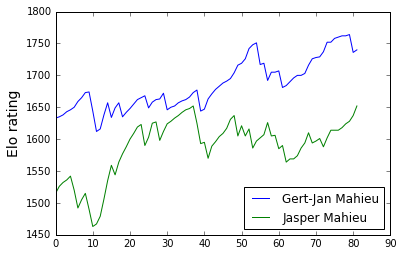

In [591]:
plt.ylabel('Elo rating', fontsize=14)
plt.plot(sample_df_2.elo.values, label="Gert-Jan Mahieu")
plt.plot(sample_df.elo.values, label="Jasper Mahieu")
plt.legend(loc="lower right")
#de vorm van de speler kunnen we misschien uit de rico halen van de ELO-grafiek, jonge spelers worden steeds beter,
#dus stijgende grafiek -> betere resultaten dan verwacht, oudere spelers kunnen ook afzwakken -> slechter scoren

#spelers die goed scoren tegen betere tegenstanders en slecht scoren tegen slechtere spelers kunnen we misschien
#herkennen aan het aantal grote sprongen (diff groter dan X) hun ELO maakt, daarvoor wel meer data nodig dan 1 seizoen

#of je neemt ELO op het einde van het jaar op, of max ELO -> potentieel
#maar ook die potentiele ELO van de tegenstander moet opgenomen worden, anders maar weinig effect

In [342]:
#sets omzetten tot resultaten, 0/1 en een resultaat dat rekening houdt met het aantal sets
def transform_sets(row):
    sets = str(row['sets'])
    sets = sets.replace(u'\xa0', u' ')
    if sets == '4 - 3':
        row['sets_score']=0.8
        row['score']=1
    elif sets == '4 - 2':
        row['sets_score']=0.85
        row['score']=1
    elif sets == '4 - 1':
        row['sets_score']=0.9
        row['score']=1
    elif sets == '4 - 0':
        row['sets_score']=1
        row['score']=1
    elif sets == '0 - 4':
        row['sets_score']=0
        row['score']=0
    elif sets == '1 - 4':
        row['sets_score']=0.1
        row['score']=0
    elif sets == '2 - 4':
        row['sets_score']=0.15
        row['score']=0
    elif sets == '3 - 4':
        row['sets_score']=0.2
        row['score']=0
    elif sets == '3 - 2':
        row['sets_score']=0.8
        row['score']=1
    elif sets == '3 - 1':
        row['sets_score']=0.9
        row['score']=1
    elif sets == '3 - 0':
        row['sets_score']=1
        row['score']=1
    elif sets == '0 - 3':
        row['sets_score']=0
        row['score']=0
    elif sets == '1 - 3':
        row['sets_score']=0.1
        row['score']=0
    elif sets == '2 - 3':
        row['sets_score']=0.2
        row['score']=0
    else:
        row['sets_score']=None
        row['score']=None
    
    return row

In [859]:
test_df = ind_match_df.sample(5000).apply(transform_sets, axis=1)
test_df = test_df.apply(get_potential_ELO, axis=1)

In [861]:
#klasselabels encoden, deze labels hebben niet echt een toegevoegde waarde voor ons model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_df['klass teg'])
test_df['klass teg'] = test_df['klass teg'].apply(le.transform)

In [862]:
test_df = test_df.drop(['naam', 'datum', 'type', 'M/T', 'P/R', 'tegenstander', 'naam teg', 'klass teg', 'sets','diff'], 1)
test_df = test_df.dropna()
test_df.head()

,elo teg,elo,sets_score,score,pot_elo,pot_teg_elo
236429,1134.0,1196.0,0.1,0.0,1395.0,1134
505448,609.0,952.0,0.9,1.0,983.0,609
693659,582.0,796.0,1.0,1.0,700.0,582
953176,412.0,309.0,0.2,0.0,297.0,412
153312,1144.0,1517.0,1.0,1.0,1517.0,1144


In [863]:
test_under100_df = test_df.loc[abs(test_df['elo'] - test_df['elo teg']) <= 100.0]
test_above100_df = test_df.loc[abs(test_df['elo'] - test_df['elo teg']) >= 101.0]
sample_count = 0.3*len(test_under100_df.index)
test_concat_df = pd.concat([test_under100_df, test_above100_df.sample(n=int(sample_count))])

In [887]:
test_concat_1 = test_df.loc[test_df['elo'] - test_df['elo teg'] > 0.0]
test_concat_2 = test_concat_1.loc[test_df['score'] > 0.0]
len(test_concat_2.index)/len(test_concat_1.index)
#Hiermee kan je checken wat de precisie is van het model "Elo > Elo teg -> winst" door deze te vergelijken

0.616519174041298

In [894]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

train_data, test_data = train_test_split(test_df, test_size=.2, random_state=42)
y_train = train_data['score']             
x_train = train_data.drop(['sets_score','score'], 1) 
y_test = test_data['score']
x_test = test_data.drop(['sets_score','score'], 1) 

In [895]:
lr_correct = LogisticRegression()
lr_correct.fit(x_train, y_train)
y_train_predict = lr_correct.predict(x_train)

In [896]:
#lr_correct.predict_proba([1600,1300,1600,1500])
#dit kunnen we gebruiken om nieuwe matchen te voorspellen, op basis van beide ELO's en potentiële ELO's

In [897]:
print(sum((y_train-y_train_predict)==0)/len(y_train))

0.654662379421


In [898]:
y_test_predict = lr_correct.predict(x_test)
print(sum((y_test-y_test_predict)==0)/len(y_test))

0.642673521851


In [899]:
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)
print(precision_score(y_test, y_pred_rf), 'precision')

0.620111731844 precision
